# 1. Data Preparation and Visualization

### 1.1 Read data

In [3]:
import numpy as np
from scipy import io as sio
from matplotlib import pyplot as plt

In [5]:
data = sio.loadmat("./ex6/ex6data1.mat")
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [9]:
X, y = data["X"], data["y"]
print(X.shape,y.shape)

(51, 2) (51, 1)


### 1.2 Visualize data

In [30]:
def plot_data():
    plt.scatter(X[:,0],X[:,1],c = y.flatten(),cmap="jet")
    plt.xlabel("x1")
    plt.ylabel("y1")

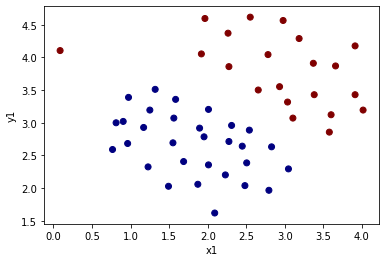

In [31]:
plot_data()

# 3. Model Implementation

### 3.1 SVM - Linear kernel - normal C

In [44]:
from sklearn.svm import SVC
svc1 = SVC(C =1 ,kernel = "linear")
svc1.fit(X,y.flatten())

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [45]:
svc1.predict(X) 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [46]:
#accuracy
svc1.score(X,y.flatten())

0.9803921568627451

In [47]:
def plot_decision_boundary(model):
    x_min,x_max = -0.5, 4.5
    y_min,y_max = 1.3, 5
    xx,yy = np.meshgrid(np.linspace(x_min,x_max,500),np.linspace(y_min,y_max,500))
    z = model.predict(np.c_[xx.flatten(),yy.flatten()])
    zz = z.reshape(xx.shape)
    plt.contour(xx,yy,zz)
    

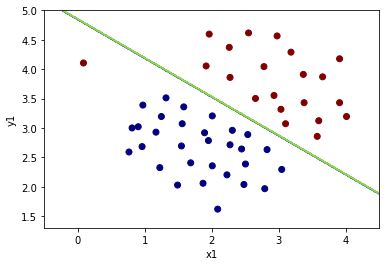

In [48]:
plot_data()
plot_decision_boundary(svc1)

### 3.2 SVM- Linear kernel - too large C (overfitting)

In [42]:
svc100 = SVC(C=100,kernel = "linear")
svc100.fit(X,y.flatten())
print("Accuracy :",svc100.score(X,y.flatten()))

Accuracy : 1.0


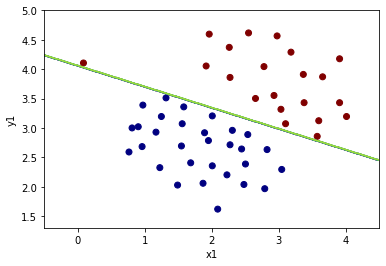

In [43]:
plot_data()
plot_decision_boundary(svc100)

As we can see, it is overfitting now. Because it took the outlier into the consideration.